<a href="https://colab.research.google.com/github/ArpitShukla007/Weather-Prediction-using-Machine-Learning/blob/master/weatherPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING LIBRARIES AND DATASETS**

> Indented block



In [0]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt  
%matplotlib inline

In [0]:
df = pd.read_csv('jfkdataset.csv')

In [0]:
df.describe()

,AWND,PRCP,TMAX,TMIN
count,3361.000000,3361.000000,3361.000000,3361.000000
mean,11.328994,0.121797,62.492115,47.987504
std,4.351655,0.358454,17.815841,16.891015
min,2.010000,0.000000,14.000000,1.000000
25%,8.050000,0.000000,48.000000,35.000000
50%,10.510000,0.000000,63.000000,48.000000
75%,13.650000,0.040000,78.000000,63.000000
max,36.240000,7.800000,103.000000,82.000000


In [0]:
df.head()

,NAME,DATE,AWND,PRCP,TMAX,TMIN
0,"JFK INTERNATIONAL AIRPORT, NY US",01-01-2010,5.37,0.04,41,32
1,"JFK INTERNATIONAL AIRPORT, NY US",02-01-2010,23.71,0.00,33,17
2,"JFK INTERNATIONAL AIRPORT, NY US",03-01-2010,25.50,0.00,24,18
3,"JFK INTERNATIONAL AIRPORT, NY US",04-01-2010,17.67,0.00,32,20
4,"JFK INTERNATIONAL AIRPORT, NY US",05-01-2010,15.88,0.00,32,21


**CHECK THE NULL DATA**

In [0]:
df.isnull().sum()

NAME    0
DATE    0
AWND    0
PRCP    0
TMAX    0
TMIN    0
dtype: int64

**MAKE A NEW COLUMN FOR AVERAGE TEMPERATURE**

In [0]:
TMEAN = (df.TMIN + df.TMAX)/2

In [0]:
df['TMEAN']=TMEAN

In [0]:
df.head()

,NAME,DATE,AWND,PRCP,TMAX,TMIN,TMEAN
0,"JFK INTERNATIONAL AIRPORT, NY US",01-01-2010,5.37,0.04,41,32,36.5
1,"JFK INTERNATIONAL AIRPORT, NY US",02-01-2010,23.71,0.00,33,17,25.0
2,"JFK INTERNATIONAL AIRPORT, NY US",03-01-2010,25.50,0.00,24,18,21.0
3,"JFK INTERNATIONAL AIRPORT, NY US",04-01-2010,17.67,0.00,32,20,26.0
4,"JFK INTERNATIONAL AIRPORT, NY US",05-01-2010,15.88,0.00,32,21,26.5


In [0]:
df.describe()

,AWND,PRCP,TMAX,TMIN,TMEAN
count,3361.000000,3361.000000,3361.000000,3361.000000,3361.000000
mean,11.328994,0.121797,62.492115,47.987504,55.239810
std,4.351655,0.358454,17.815841,16.891015,17.171012
min,2.010000,0.000000,14.000000,1.000000,9.000000
25%,8.050000,0.000000,48.000000,35.000000,41.500000
50%,10.510000,0.000000,63.000000,48.000000,55.000000
75%,13.650000,0.040000,78.000000,63.000000,71.000000
max,36.240000,7.800000,103.000000,82.000000,90.500000


**SELECTING NECESSARY FEATURES**

In [0]:
features = ["DATE","AWND","PRCP", "TMAX","TMIN","TMEAN"]

**DERIVE THESE FEATURES FOR 3 DAYS BEFORE PREDICTION DATE**

In [0]:
def derive_nth_day_feature(df, feature, N):  
    rows = df.shape[0]
    nth_prior_measurements = [None]*N + [df[feature][i-N] for i in range(N, rows)]
    col_name = "{}_{}".format(feature, N)
    df[col_name] = nth_prior_measurements

In [0]:
for feature in features:  
    if feature != 'DATE':
        for N in range(1, 4):
            derive_nth_day_feature(df, feature, N)

In [0]:
df.columns

Index(['NAME', 'DATE', 'AWND', 'PRCP', 'TMAX', 'TMIN', 'TMEAN', 'AWND_1',
       'AWND_2', 'AWND_3', 'PRCP_1', 'PRCP_2', 'PRCP_3', 'TMAX_1', 'TMAX_2',
       'TMAX_3', 'TMIN_1', 'TMIN_2', 'TMIN_3', 'TMEAN_1', 'TMEAN_2',
       'TMEAN_3'],
      dtype='object')

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3361 entries, 0 to 3360
Data columns (total 22 columns):
NAME       3361 non-null object
DATE       3361 non-null object
AWND       3361 non-null float64
PRCP       3361 non-null float64
TMAX       3361 non-null int64
TMIN       3361 non-null int64
TMEAN      3361 non-null float64
AWND_1     3360 non-null float64
AWND_2     3359 non-null float64
AWND_3     3358 non-null float64
PRCP_1     3360 non-null float64
PRCP_2     3359 non-null float64
PRCP_3     3358 non-null float64
TMAX_1     3360 non-null float64
TMAX_2     3359 non-null float64
TMAX_3     3358 non-null float64
TMIN_1     3360 non-null float64
TMIN_2     3359 non-null float64
TMIN_3     3358 non-null float64
TMEAN_1    3360 non-null float64
TMEAN_2    3359 non-null float64
TMEAN_3    3358 non-null float64
dtypes: float64(18), int64(2), object(2)
memory usage: 577.8+ KB


**HISTOGRAM VIEW **

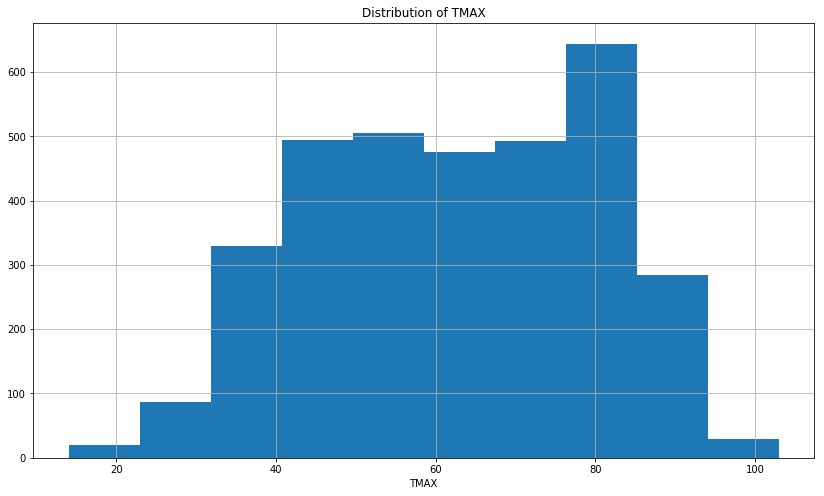

In [0]:

plt.rcParams['figure.figsize'] = [14, 8]  
df.TMAX.hist()
plt.title('Distribution of TMAX')  
plt.xlabel('TMAX')  
plt.show()  

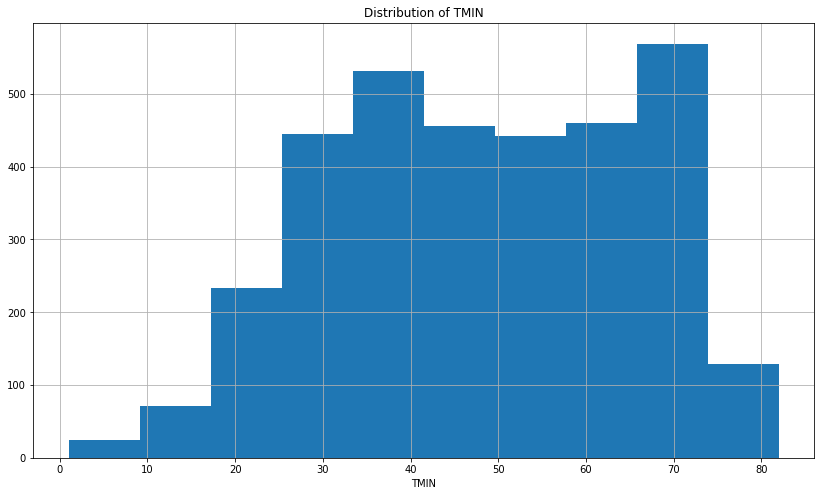

In [0]:
plt.rcParams['figure.figsize'] = [14, 8]  
df.TMIN.hist()
plt.title('Distribution of TMIN')  
plt.xlabel('TMIN')  
plt.show()  

In [0]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AWND,3361.0,11.328994,4.351655,2.01,8.0500,10.51,13.65,36.24
PRCP,3361.0,0.121797,0.358454,0.00,0.0000,0.00,0.04,7.80
TMAX,3361.0,62.492115,17.815841,14.00,48.0000,63.00,78.00,103.00
TMIN,3361.0,47.987504,16.891015,1.00,35.0000,48.00,63.00,82.00
TMEAN,3361.0,55.239810,17.171012,9.00,41.5000,55.00,71.00,90.50
AWND_1,3360.0,11.327241,4.351115,2.01,8.0500,10.51,13.65,36.24
AWND_2,3359.0,11.327017,4.351744,2.01,8.0500,10.51,13.65,36.24
AWND_3,3358.0,11.328058,4.351973,2.01,8.1075,10.51,13.65,36.24
PRCP_1,3360.0,0.121786,0.358506,0.00,0.0000,0.00,0.04,7.80
PRCP_2,3359.0,0.121822,0.358554,0.00,0.0000,0.00,0.04,7.80


In [0]:
df.head()

,NAME,DATE,AWND,PRCP,TMAX,TMIN,TMEAN,AWND_1,AWND_2,AWND_3,...,PRCP_3,TMAX_1,TMAX_2,TMAX_3,TMIN_1,TMIN_2,TMIN_3,TMEAN_1,TMEAN_2,TMEAN_3
0,"JFK INTERNATIONAL AIRPORT, NY US",01-01-2010,5.37,0.04,41,32,36.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"JFK INTERNATIONAL AIRPORT, NY US",02-01-2010,23.71,0.00,33,17,25.0,5.37,NaN,NaN,...,NaN,41.0,NaN,NaN,32.0,NaN,NaN,36.5,NaN,NaN
2,"JFK INTERNATIONAL AIRPORT, NY US",03-01-2010,25.50,0.00,24,18,21.0,23.71,5.37,NaN,...,NaN,33.0,41.0,NaN,17.0,32.0,NaN,25.0,36.5,NaN
3,"JFK INTERNATIONAL AIRPORT, NY US",04-01-2010,17.67,0.00,32,20,26.0,25.50,23.71,5.37,...,0.04,24.0,33.0,41.0,18.0,17.0,32.0,21.0,25.0,36.5
4,"JFK INTERNATIONAL AIRPORT, NY US",05-01-2010,15.88,0.00,32,21,26.5,17.67,25.50,23.71,...,0.00,32.0,24.0,33.0,20.0,18.0,17.0,26.0,21.0,25.0


**Check out the CORELATION**

In [0]:
df.corr()[['TMEAN']].sort_values('TMEAN')

,TMEAN
AWND_1,-0.371482
AWND_2,-0.338988
AWND,-0.306538
AWND_3,-0.305982
PRCP_2,-0.023999
PRCP_3,-0.021435
PRCP_1,0.001379
PRCP,0.008295
TMAX_3,0.869724
TMIN_3,0.879935


In [0]:

spread = df.describe().T
# precalculate interquartile range for ease of use in next calculation
IQR = spread['75%'] - spread['25%']

# create an outliers column which is either 3 IQRs below the first quartile or
# 3 IQRs above the third quartile
spread['outliers'] = (spread['min']<(spread['25%']-(3*IQR)))|(spread['max'] > (spread['75%']+3*IQR))

# just display the features containing extreme outliers
spread.ix[spread.outliers,]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


,count,mean,std,min,25%,50%,75%,max,outliers
AWND,3361.0,11.328994,4.351655,2.01,8.0500,10.51,13.65,36.24,True
PRCP,3361.0,0.121797,0.358454,0.00,0.0000,0.00,0.04,7.80,True
AWND_1,3360.0,11.327241,4.351115,2.01,8.0500,10.51,13.65,36.24,True
AWND_2,3359.0,11.327017,4.351744,2.01,8.0500,10.51,13.65,36.24,True
AWND_3,3358.0,11.328058,4.351973,2.01,8.1075,10.51,13.65,36.24,True
PRCP_1,3360.0,0.121786,0.358506,0.00,0.0000,0.00,0.04,7.80,True
PRCP_2,3359.0,0.121822,0.358554,0.00,0.0000,0.00,0.04,7.80,True
PRCP_3,3358.0,0.121858,0.358601,0.00,0.0000,0.00,0.04,7.80,True


In [0]:
predictors = ['TMAX_1' , 'TMAX_2' ,	'TMAX_3' ,
              'TMIN_1' , 'TMIN_2' , 'TMIN_3' ,	
              'TMEAN_1' , 'TMEAN_2' ,	'TMEAN_3']
df2 = df[['TMEAN'] + predictors]

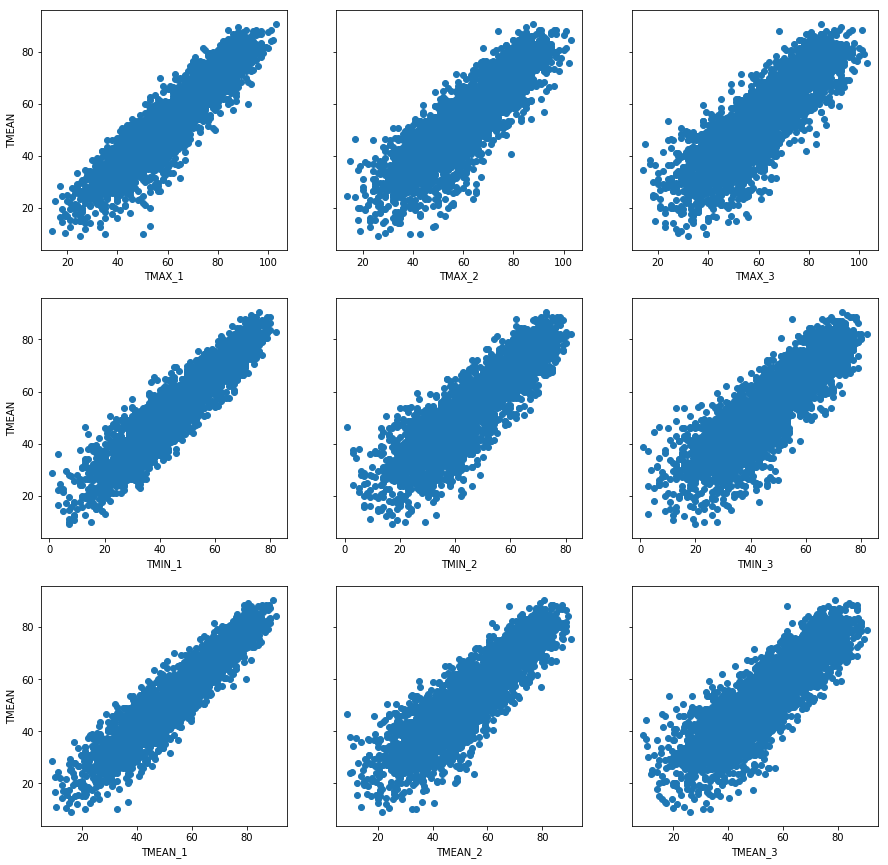

In [0]:

# manually set the parameters of the figure to and appropriate size
plt.rcParams['figure.figsize'] = [15, 15]

# call subplots specifying the grid structure we desire and that 
# the y axes should be shared
fig, axes = plt.subplots(nrows=3, ncols=3, sharey=True)

# Since it would be nice to loop through the features in to build this plot
# let us rearrange our data into a 2D array of 3 rows and 3 columns
arr = np.array(predictors).reshape(3, 3)

# use enumerate to loop over the arr 2D array of rows and columns
# and create scatter plots of each meantempm vs each feature
for row, col_arr in enumerate(arr):  
    for col, feature in enumerate(col_arr):
        axes[row, col].scatter(df2[feature], df2['TMEAN'])
        if col == 0:
            axes[row, col].set(xlabel=feature, ylabel='TMEAN')
        else:
            axes[row, col].set(xlabel=feature)
plt.show()  

In [0]:
# separate our my predictor variables (X) from my outcome variable y
X = df2[predictors]  
y = df2['TMEAN']

 





In [0]:
# Add a constant to the predictor variable set to represent the Bo intercept
X = sm.add_constant(X) 
X.head()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,TMAX_1,TMAX_2,TMAX_3,TMIN_1,TMIN_2,TMIN_3,TMEAN_1,TMEAN_2,TMEAN_3
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,41.0,NaN,NaN,32.0,NaN,NaN,36.5,NaN,NaN
2,1.0,33.0,41.0,NaN,17.0,32.0,NaN,25.0,36.5,NaN
3,1.0,24.0,33.0,41.0,18.0,17.0,32.0,21.0,25.0,36.5
4,1.0,32.0,24.0,33.0,20.0,18.0,17.0,26.0,21.0,25.0


In [0]:
# Slice first 3 rows
X = X.iloc[3:]
y = y.iloc[3:]

In [0]:
print(X.head())
print(y.head())

   const  TMAX_1  TMAX_2  TMAX_3  TMIN_1  TMIN_2  TMIN_3  TMEAN_1  TMEAN_2  \
3    1.0    24.0    33.0    41.0    18.0    17.0    32.0     21.0     25.0   
4    1.0    32.0    24.0    33.0    20.0    18.0    17.0     26.0     21.0   
5    1.0    32.0    32.0    24.0    21.0    20.0    18.0     26.5     26.0   
6    1.0    36.0    32.0    32.0    26.0    21.0    20.0     31.0     26.5   
7    1.0    40.0    36.0    32.0    29.0    26.0    21.0     34.5     31.0   

   TMEAN_3  
3     36.5  
4     25.0  
5     21.0  
6     26.0  
7     26.5  
3    26.0
4    26.5
5    31.0
6    34.5
7    28.0
Name: TMEAN, dtype: float64


In [0]:
# (1)Set learing rate
  alpha = 0.05

# (2) Fit the model
model = sm.OLS(y, X).fit()

predictions = model.predict(X)

# (3) evaluate the coefficients' p-values
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  TMEAN   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     5539.
Date:                Sat, 04 May 2019   Prob (F-statistic):               0.00
Time:                        02:31:21   Log-Likelihood:                -10296.
No. Observations:                3358   AIC:                         2.061e+04
Df Residuals:                    3351   BIC:                         2.065e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0533      0.443      6.886      0.000       2.184       3.923
TMAX_1         0.1721      0.018      9.414      0.000       0.136       0.208
TMAX_2         0.0279      0.019      1.484      0.138      -0.009       0.065
TMAX_3         0.0415      0.018      2.264      0.024       0.006       0.077
TMIN_1         0.4737      0.022     21.631      0.000       0.431       0.517
TMIN_2        -0.2176      0.024     -8.975      0.000      -0.265      -0.170
TMIN_3         0.1464      0.021      6.916      0.000       0.105       0.188
TMEAN_1        0.3229      0.006     55.110      0.000       0.311       0.334
TMEAN_2       -0.0948      0.008    -11.706      0.000      -0.111      -0.079
TMEAN_3        0.0940      0.006     16.090      0.000       0.083       0.105
==============================================================================
Omnibus:                       21.502   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.246
Skew:                          -0.069   Prob(JB):                     4.46e-07
Kurtosis:                       3.436   Cond. No.                     1.27e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.31e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [0]:
from sklearn.model_selection import train_test_split  
# first remove the const column because unlike statsmodels, SciKit-Learn will add that in for us
X = X.drop('const', axis=1)
#newX will be used further for actual prediction 
newX=X.iloc[3357]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
X_train.head()

,TMAX_1,TMAX_2,TMAX_3,TMIN_1,TMIN_2,TMIN_3,TMEAN_1,TMEAN_2,TMEAN_3
823,58.0,52.0,44.0,40.0,42.0,39.0,49.0,47.0,41.5
750,37.0,38.0,53.0,27.0,18.0,24.0,32.0,28.0,38.5
2491,53.0,54.0,66.0,40.0,44.0,48.0,46.5,49.0,57.0
3296,47.0,46.0,35.0,34.0,35.0,25.0,40.5,40.5,30.0
3083,72.0,79.0,74.0,57.0,65.0,58.0,64.5,72.0,66.0


In [0]:
from sklearn.linear_model import LinearRegression  
# instantiate the regressor class
regressor = LinearRegression()

# fit the build the model by fitting the regressor to the training data
regressor.fit(X_train, y_train)

# make a prediction set using the test set
prediction = regressor.predict(X_test)

# Evaluate the prediction accuracy of the model
from sklearn.metrics import mean_absolute_error, median_absolute_error  
print("The Explained Variance: %.4f" % regressor.score(X_test, y_test))  
print("The Mean Absolute Error: %.2f degrees celsius" % mean_absolute_error(y_test, prediction))  
print("The Median Absolute Error: %.2f degrees celsius" % median_absolute_error(y_test, prediction)) 

The Explained Variance: 0.9016
The Mean Absolute Error: 4.12 degrees celsius
The Median Absolute Error: 3.26 degrees celsius


**ACTUAL PREDICTION**

In [0]:
#prediction of value out of sample dataset

# define one new data instance
Xnew = [[59,52,42,47,38,29,53,45,35]]
# make a prediction
ynew = regressor.predict(Xnew)
# show the inputs and predicted outputs
print("X=%s, Predicted=%s"%(Xnew[0], ynew[0]))

X=[59, 52, 42, 47, 38, 29, 53, 45, 35], Predicted=50.877035174116116
